# EXPLORATORY DATA ANALYSIS USING TELECOM CHURN DATA

In [9]:
# Importing all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read data
df=pd.read_csv("Customer Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# inspect the  data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing the blancks with 0 and convert it into floats

In [18]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0").astype("float")

df.info()

In [21]:
# Checking whether any null values are there or not
df.isnull().sum().sum()

0

### Decriptive analysis

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Checking for duplicates:

In [24]:
df.duplicated().sum()

0

In [26]:
#checking duplicates based on unique data
df["customerID"].duplicated().sum()

0

### Converting SeniorCitizen value from 0/1 to yes/no to make it unsderstandable

In [27]:
def conv(value):
    if value==1:
        return 'yes'
    else:
        return 'no'

df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


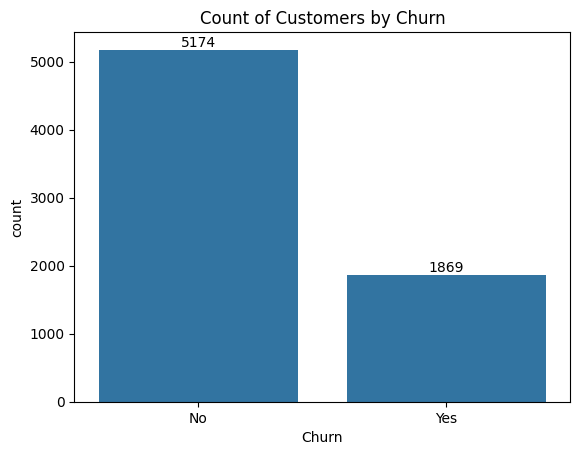

In [57]:
ax=sns.countplot(x="Churn",data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [35]:
#Groupby
gb=df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


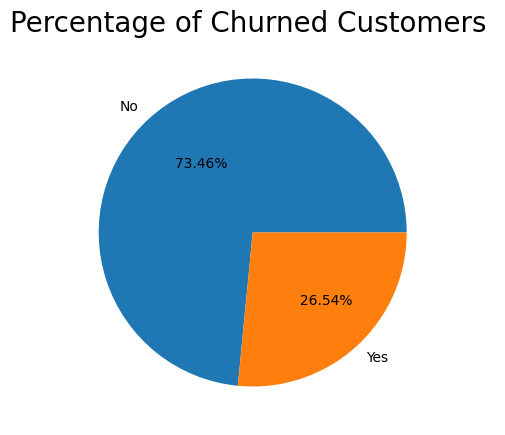

In [55]:
#representing data in pie chart:
plt.figure(figsize=(10,5))
plt.pie(gb['Churn'],labels=gb.index,autopct="%10.2f%%")
plt.title("Percentage of Churned Customers ",fontsize=20)
plt.show()

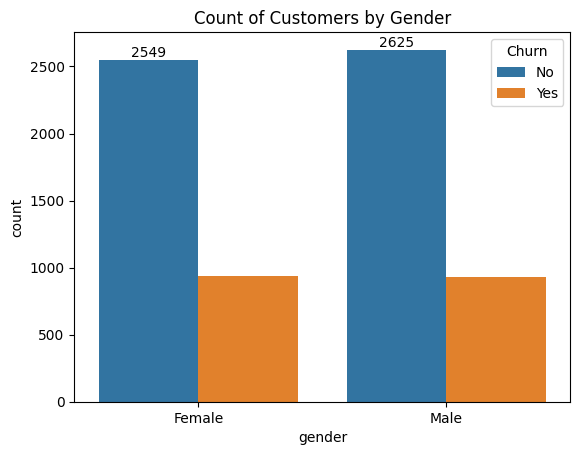

In [62]:
gender_count=sns.countplot(x="gender",data=df,hue="Churn")

gender_count.bar_label(gender_count.containers[0])
plt.title("Count of Customers by Gender")
plt.show()

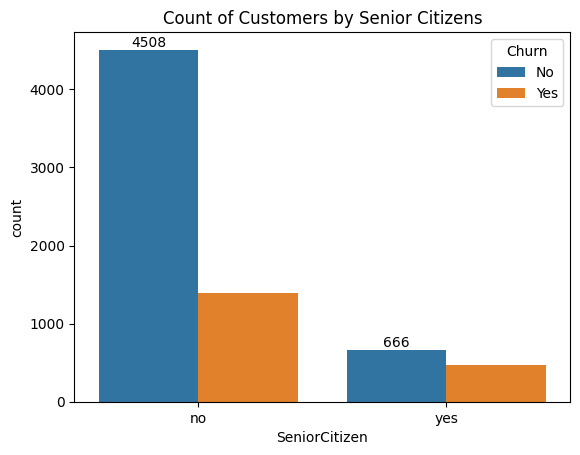

In [69]:
gender_count=sns.countplot(x="SeniorCitizen",data=df,hue="Churn")

gender_count.bar_label(gender_count.containers[0])
plt.title("Count of Customers by Senior Citizens")
plt.show()

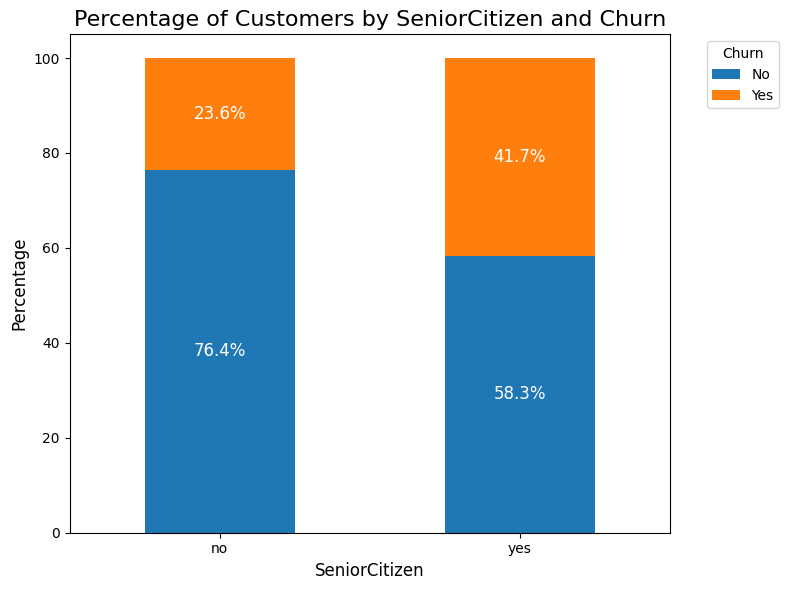

In [68]:

# Calculate the total count for each group (SeniorCitizen and Churn)
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Calculate percentages (with group_keys=False to avoid future warnings)
grouped['Percent'] = grouped.groupby('SeniorCitizen', group_keys=False)['Count'].apply(lambda x: x / x.sum() * 100)

# Create the pivot table (with keyword-only arguments to avoid future warnings)
pivot_table = grouped.pivot(index="SeniorCitizen", columns="Churn", values="Percent")

# Plot the stacked bar chart
ax = pivot_table.plot(kind="bar", stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8,6))

# Add labels for each bar segment with percentage values
for n, x in enumerate([*pivot_table.index.values]):
    bottom = 0  # starting position for each segment's label
    for (i, y) in enumerate(pivot_table.loc[x]):
        height = y
        if y > 0:  # To avoid placing text for empty segments
            plt.text(n, bottom + height / 2, f'{y:.1f}%', ha="center", va="center", color="white", fontsize=12)
        bottom += height  # move the starting point for the next segment

# Set plot labels and title
plt.title('Percentage of Customers by SeniorCitizen and Churn', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('SeniorCitizen', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Comparitively a greater percentage of people in senior citizen category have churned

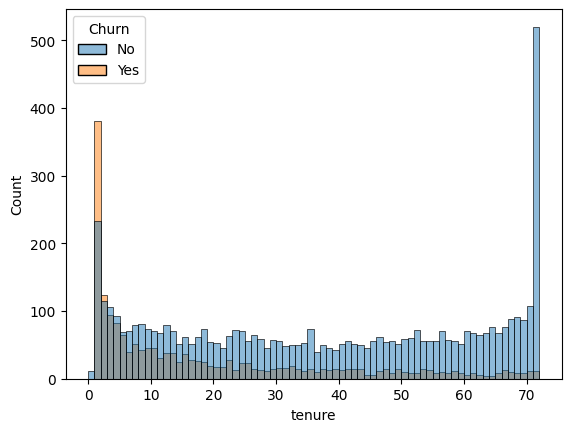

In [75]:
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

### people who have used our services have stayed and  people used for 1 or 2 months churned out

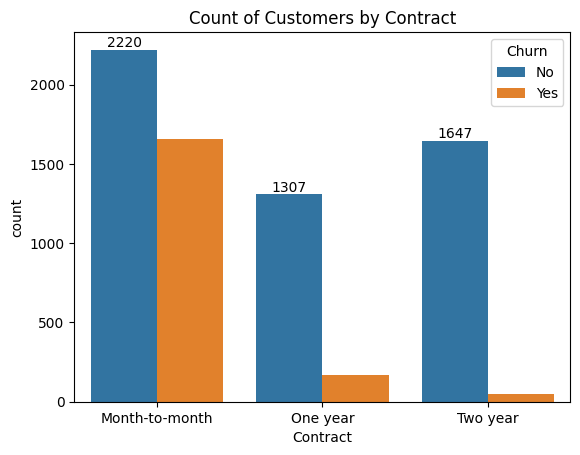

In [76]:
gender_count=sns.countplot(x="Contract",data=df,hue="Churn")

gender_count.bar_label(gender_count.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

### people who have mont to onth contract are likely to churn from who have 1 or 2 years of contract

In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

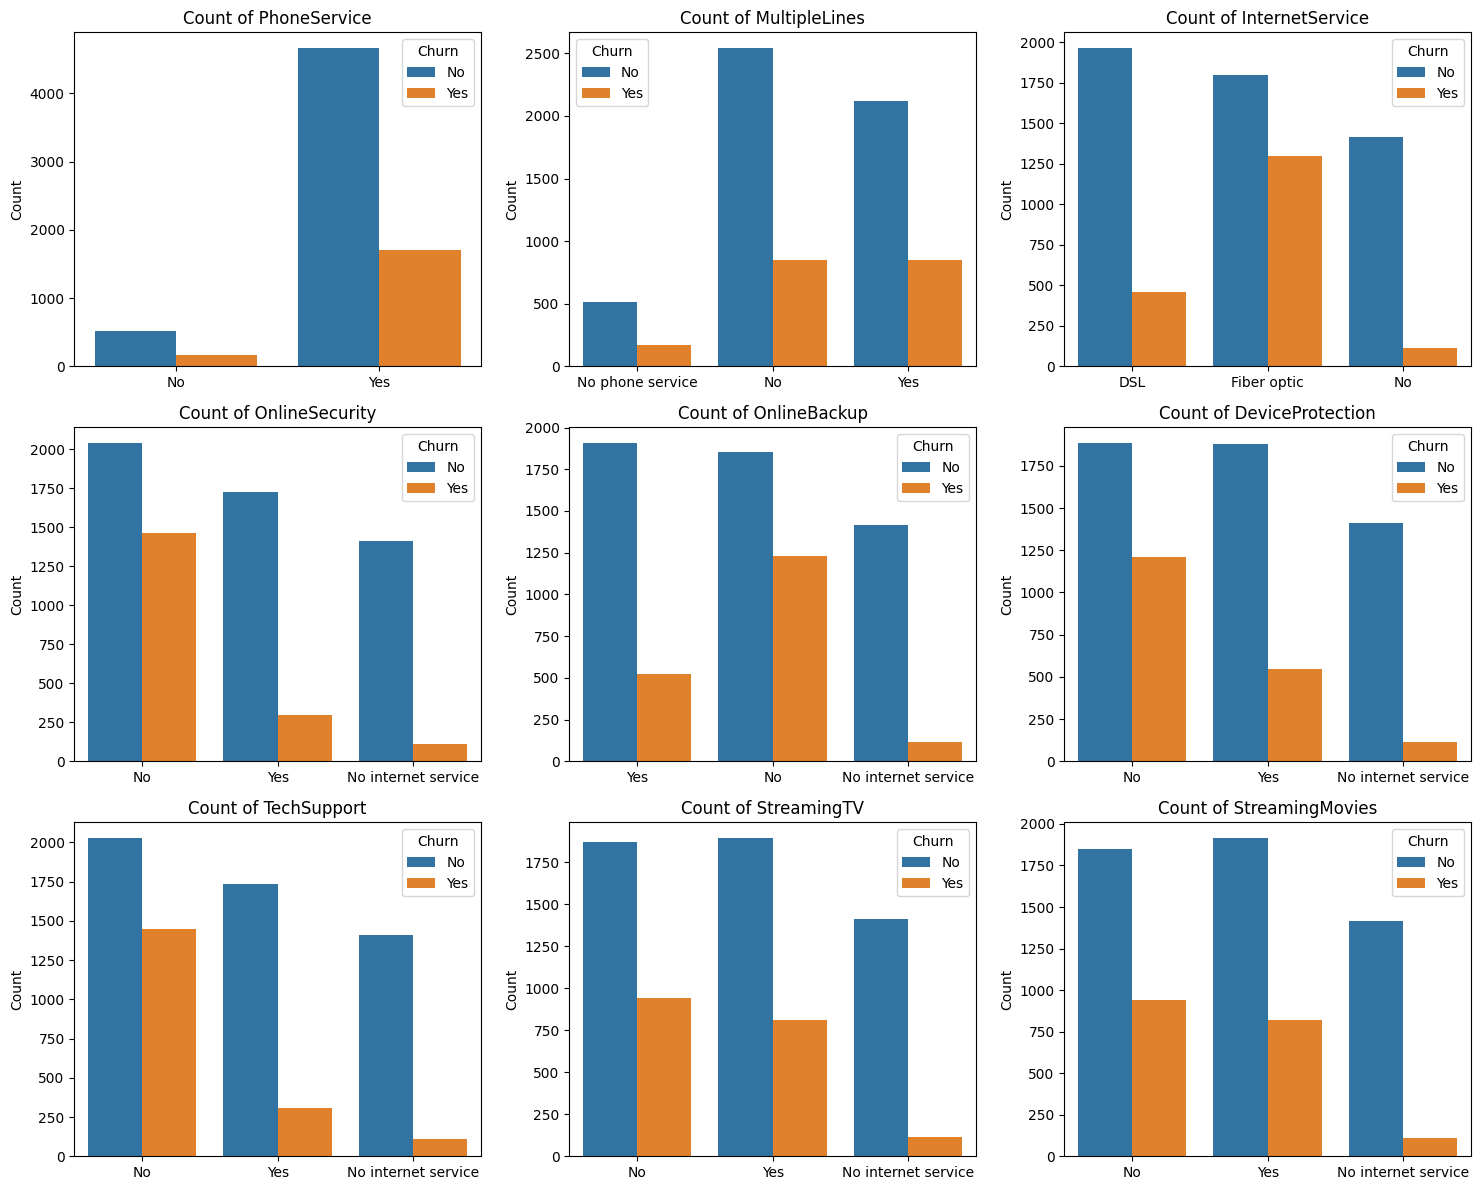

In [79]:

# Define the columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
           'StreamingMovies']

# Create subplots: adjust the number of rows and columns based on the number of plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue="Churn")
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')  # Hide x-axis label for clarity
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


Support Services (OnlineSecurity, OnlineBackup, TechSupport):
Customers who subscribe to these services tend to churn less, indicating that providing additional security and support could improve customer retention.
Internet Service (Fiber Optic):
Customers using fiber optic internet tend to churn at a higher rate than DSL users, suggesting possible issues with fiber service quality, pricing, or customer satisfaction.


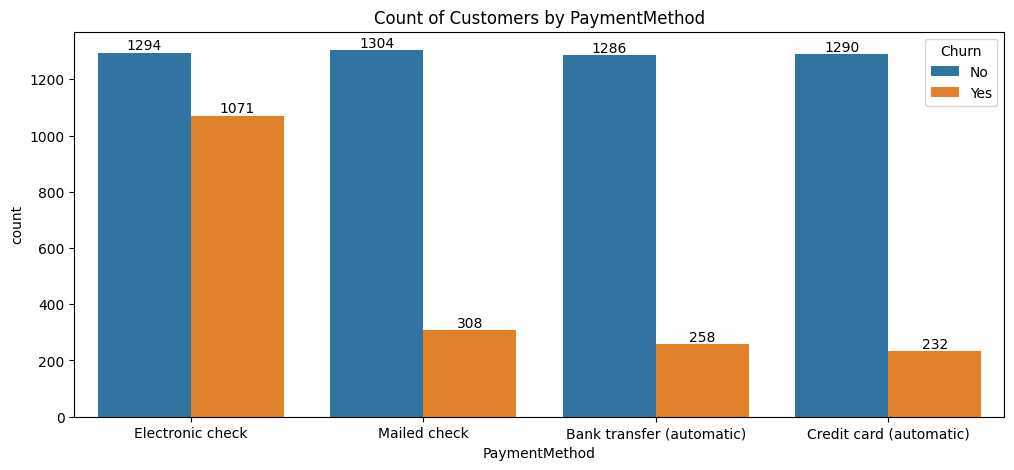

In [89]:
plt.figure(figsize=(12,5))
gender_count=sns.countplot(x="PaymentMethod",data=df,hue="Churn")

gender_count.bar_label(gender_count.containers[0])
gender_count.bar_label(gender_count.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.show()